# Tutorial 2: Neural Network Training
The tutorial is meant to build some understanding of how neural networks learn relationships between features `x` and a 
target `y`. The tutorial deals with gradient descent. In the exercises, we assume that students are familiar with the general form of neural networks. Hence, the architecture of neural networks is not part of the exercises. Instead, we recommend going through "Ex04-NN-Primer-part1.ipynb". That notebook covers the architecture of neural networks and the learning procedure. Here, we only focus on the latter.

"Ex04-NN-Primer-part1.ipynb" treats topics like gradient descent for neural networks of general architecture. For this exercise, we restrict the architecture of the considered neural networks to the form
$f(x)=\beta\cdot sigmoid(x)$. This corresponds to a very simple neural network with linear output function, sigmoid activation, 1 hidden layer and bias (constants) forced to zero. By considering this simple neural network, the code becomes simpler, and you can (hopefully) gain a better intuition of neural network learning procedures.  

We will go through further exercises covering back-propagation and stochastic gradient descent during the session.

In [1]:
## required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## create data
x = np.array(range(-10,10))
y = 2*sigmoid(x)

## Exercises
Our goal is to find the coefficient beta, such that the function $f(x)=\beta\cdot sigmoid(x)$ fits the data best 
(according to the mean squared error).  
Your task is to implement gradient descent in order to find beta. This means in detail:

### Part A.
You need to calculate the derivative of the loss function $L(Y,f(X))=\frac{1}{n}\sum_{i}(y_{i}-f(x_{i}))^{2}$ w.r.t. $\beta$. For simplicity we provide an impementation of this loss function called `grad_beta`

In [3]:
def func_f(beta, x):
    return beta*sigmoid(x)
def grad_beta(beta, y, x): 
    return np.mean(-2*(y-func_f(beta, x))*sigmoid(x))

### Part B. 
Implement a function `grad_desc(beta_ini, lrate, n_epochs)`, with an initial value of beta, the learning rate and the number of iterations (called epochs) as parameters. The function should find the $\beta$ leading to the minimum loss.

In [4]:
def grad_desc(beta_ini, lrate, n_epochs):
    iters = 0
    cur_beta = beta_ini
    cur_mse = np.mean(pow(y-func_f(cur_beta, x),2))
    
    ## plot loss function
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.plot(np.array(range(-100,400))/100,[np.mean(pow(y-func_f(beta, x),2)) for beta in np.array(range(-100,400))/100])
    plt.plot(cur_beta, cur_mse, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
    plt.title('Loss function for learning rate '+ str(lrate))
    plt.xlabel('beta')
    plt.xlim(-1,4)
    plt.ylim(-0.1,4)
    
    ## iterative weight update
    while iters < n_epochs:
        prev_beta = cur_beta 
        cur_beta = cur_beta - lrate * grad_beta(cur_beta, y, x)
        cur_mse = np.mean(pow(y-func_f(cur_beta, x),2))
        
        ## plot current beta in loss function
        plt.plot(cur_beta, cur_mse, marker="o", markersize=10/np.sqrt((iters+2)), markeredgecolor="red", markerfacecolor="red")
        iters = iters+1 #iteration count
    
    ## show plot
    plt.subplot(1, 2, 2) # index 2
    plt.plot(x, func_f(beta = 2, x = x), label = 'true relation', color = 'black')
    plt.plot(x, func_f(beta = cur_beta, x = x), label = 'model', color = 'red')
    plt.legend(loc="upper left")
    plt.title('True vs. fitted function')
    plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)
    plt.show()
    plt.close()

### Part C. 
Apply your function for `beta_ini=0`, `n_epochs=20` and some learning rates of your choice. Which is the best learning rate? What happens for particularly high or low learning rates?

##### good learning rate #####


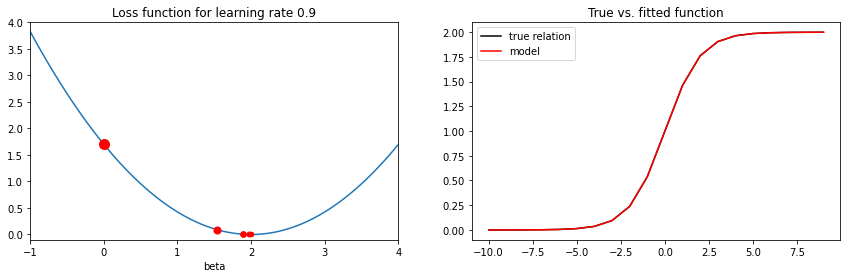

##### high learning rate #####


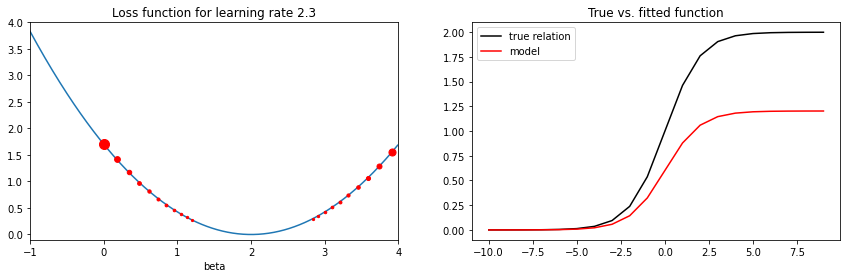

##### low learning rate #####


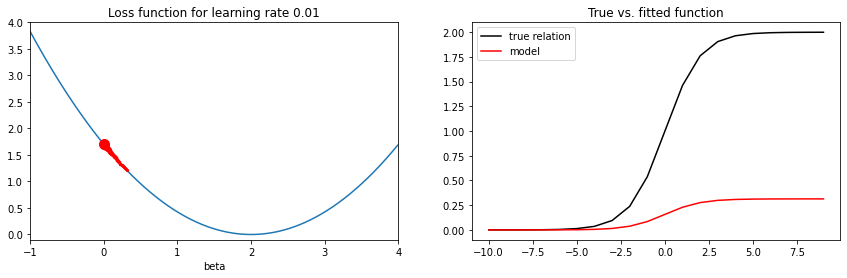

In [5]:
print('##### good learning rate #####')
grad_desc(beta_ini = 0, lrate=0.9, n_epochs=20)
print('##### high learning rate #####')
grad_desc(beta_ini = 0, lrate=2.3, n_epochs=20)
print('##### low learning rate #####')
grad_desc(beta_ini = 0, lrate=0.01, n_epochs=20)

## Extra exercises done in the tutorial
So far, we have seen how to use gradient descent to fit a simple model of the form $f(x)=\beta\cdot sigmoid(x)$. However, implementing gradient descent is more challenging for more complex neural networks because the gradients are harder to calculate. Here is where back-propagation comes into play. 

Your task is to implement gradient descent with back-propagation for a slightly more complex neural network of the form $g(x)=\gamma\cdot sigmoid(\beta\cdot sigmoid(\alpha\cdot x))$.

In detail:


### Part A. 
You first need data points to fit the model, so let's create them

In [6]:
## create data
x = np.array(range(-10,10))
y = 2*sigmoid(sigmoid(x))

### Part B. 
You need to calculate the partial derivative of the loss function w.r.t. $\alpha$, $\beta$ and $\gamma$. 
Where is the back-propagation part in the calculation of the derivatives? 

For simplicity, we provide a sample solution of how to calculate the derivatives `grad_gamma`, `grad_beta`, `grad_alpha` at the weights `cur_alpha`, `cur_beta`, and `cur_gamma`. 

In [7]:
def func_g(alpha, beta, gamma, x):
    return gamma*sigmoid(beta*sigmoid(alpha*x))

def deriv_loss(cur_g, y):
    return -2*(y-cur_g)

def deriv_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))
        
## function outputs for current weights
#cur_g = func_g(alpha = cur_alpha, beta = cur_beta, gamma = cur_gamma, x = x)
        
## gradients output layer
#val_l3 = sigmoid(cur_beta*sigmoid(cur_alpha*x))
#delta_l3 = deriv_loss(cur_g = cur_g, y = y)
#grad_gamma = np.mean(delta_l3*val_l3)
        
## gradient second hidden layer
#val_l2 = sigmoid(cur_alpha*x)
#delta_l2 = delta_l3 * cur_gamma * deriv_sigmoid(cur_beta*val_l2)
#grad_beta = np.mean(delta_l2*val_l2)
        
## gradient first hidden layer
#val_l1 = x
#delta_l1 = delta_l2 * cur_beta * deriv_sigmoid(cur_alpha*val_l1)
#grad_alpha = np.mean(delta_l1*val_l1)
        

**Answer**: The back-propagation parts are the delta values (`delta_l3`, `delta_l2`) which are passed to the next layer. This makes the calculation of derivatives in the lower layers more efficient.  

### Part C.
Implement a function `grad_desc_backp(alpha_ini, beta_ini, gamma_ini, lrate, n_epochs)`, with an initial value of alpha, beta and 
gamma, the learning rate and a maximum number of iterations as parameters.

In [8]:
def grad_desc_backp(alpha_ini, beta_ini, gamma_ini, lrate, n_epochs):
    iters = 0
    cur_alpha = alpha_ini
    cur_beta = beta_ini
    cur_gamma = gamma_ini
    cur_mse = np.mean(pow(y-func_g(alpha = cur_alpha, beta = cur_beta, gamma = cur_gamma, x = x),2))
    
    ## plot loss function
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.plot(-1, cur_mse, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
    plt.title('Loss function for learning rate '+ str(lrate))
    plt.xlabel('log(epoch)')
    plt.xlim(0,np.log(n_epochs+1))
    plt.ylim(-0.1,4)
    
    ## iterative weight update
    while iters < n_epochs:

        ## function outputs for current weights
        cur_g = func_g(alpha = cur_alpha, beta = cur_beta, gamma = cur_gamma, x = x)
        
        ## gradients output layer
        val_l3 = sigmoid(cur_beta*sigmoid(cur_alpha*x))
        delta_l3 = deriv_loss(cur_g = cur_g, y = y)
        grad_gamma = np.mean(delta_l3*val_l3)
        
        ## gradient second hidden layer
        val_l2 = sigmoid(cur_alpha*x)
        delta_l2 = delta_l3 * cur_gamma * deriv_sigmoid(cur_beta*val_l2)
        grad_beta = np.mean(delta_l2*val_l2)
        
        ## gradient first hidden layer
        val_l1 = x
        delta_l1 = delta_l2 * cur_beta * deriv_sigmoid(cur_alpha*val_l1)
        grad_alpha = np.mean(delta_l1*val_l1)
        
        ## update weights
        cur_alpha = cur_alpha - lrate * grad_alpha
        cur_beta = cur_beta - lrate * grad_beta
        cur_gamma = cur_gamma - lrate * grad_gamma
        cur_mse = np.mean(pow(y-func_g(alpha = cur_alpha, beta = cur_beta, gamma = cur_gamma, x = x),2)) 
        
        ## plot loss for current weights
        plt.plot(np.log(iters+1), cur_mse, marker="o", markersize=10/np.sqrt((iters+2)), markeredgecolor="red", markerfacecolor="red")
        iters = iters+1 #iteration count
        
    ## show plot
    plt.subplot(1, 2, 2) # index 2
    plt.plot(x, y, label = 'true relation', color = 'black')
    plt.plot(x, func_g(alpha = cur_alpha, beta = cur_beta, gamma = cur_gamma, x = x), label = 'model', color = 'red')
    plt.legend(loc="upper left")
    plt.title('True vs. fitted function')
    plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)
    plt.show()
    plt.close()

### Part D.
Apply your function for alpha_ini=2,beta_ini=0, gamma_ini=0, n_epochs=1000 and some learning rates of your choice.
Which is the best learning rate? 

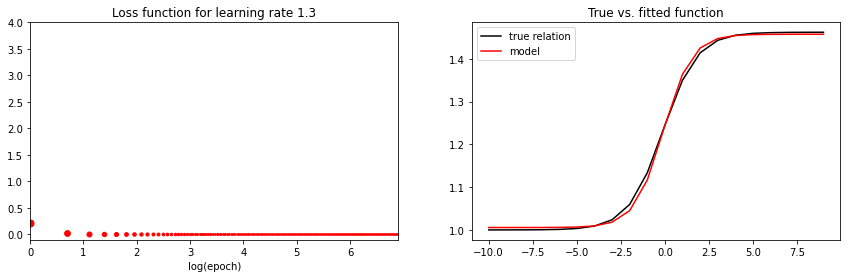

In [9]:
grad_desc_backp(alpha_ini=2, beta_ini=0, gamma_ini=0, lrate = 1.3, n_epochs = 1000)

### Part E. 
What happens to the gradients in the gradient descent algorithm if we add further layers to the neural network? Why is back-propagation important for multi-layer neural networks?

**Answer**: For multi-layer neural networks, the computation of derivatives in weights becomes costly. Gradients of the lower layers are dependent on parts of the gradients of the above layers. Back-propagation makes the computation of gradients more efficient by handing parts of the gradients from the upper layers to the lower layers.

## Bonus exercises
Now you need to implement stochastic and mini-batch gradient descent. To keep matters as simple as possible, you need to implement the algorithm for the function f(x) of exercise 1. You will need to adapt the function `grad_desc(beta_ini, lrate, max_iters)`, which currently performs batch gradient descent. In detail, you have to:

### Part A.
Again generate the data for the network $f(x)=\beta\cdot sigmoid(x)$, which we want to fit with mini-batch or stochastic gradient descent. The data is generated for you below. Note that we add noise to the relation between x and y from exercise 1. 

In [10]:
## create data
x = np.sort(np.random.uniform(-10, 10, size = 1000))
y = 2*sigmoid(x) + np.random.normal(loc = 0, scale = 1, size = 1000)

### Part B.
Write a function `grad_descent_stoch(beta_ini, lrate, n_epochs, batch_size)`, which adapts the previous `grad_desc` function.

In [11]:
def grad_desc_stoch(beta_ini, lrate, n_epochs, batch_size):
    iters = 0
    cur_beta = beta_ini
    cur_mse = np.mean(pow(y-func_f(cur_beta, x),2))
    
    ## plot loss function
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.plot(np.array(range(-100,400))/100,[np.mean(pow(y-func_f(beta, x),2)) for beta in np.array(range(-100,400))/100])
    plt.plot(cur_beta, cur_mse, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
    plt.title('Loss function for learning rate '+ str(lrate))
    plt.xlabel('beta')
    plt.xlim(-1,4)
    plt.ylim(-0.1,4)
    
    ## iterative weight update
    while iters < n_epochs:
        
        ## shuffle index of samples
        rand_idx = np.random.permutation(np.array(range(0,len(y))))
        
        ## calculate gardient and update weights for each batch
        for i_batch in range(0, int(len(y)/batch_size)):
            
            ## select mini-batch
            x_batch = x[rand_idx[i_batch*batch_size:(i_batch+1)*batch_size],]
            y_batch = y[rand_idx[i_batch*batch_size:(i_batch+1)*batch_size]]
            
            ## update weights
            cur_beta = cur_beta - lrate * grad_beta(cur_beta, y_batch, x_batch)
            cur_mse = np.mean(pow(y-func_f(cur_beta, x),2))
        
            ## plot current beta in loss function
            plt.plot(cur_beta, cur_mse, marker="o", markersize=10/np.sqrt((iters*len(y)/batch_size+i_batch+2)), markeredgecolor="red", markerfacecolor="red")
            
        iters = iters+1 #iteration count
          
    ## show plot
    plt.subplot(1, 2, 2) # index 2
    plt.plot(x, func_f(beta = 2, x = x), label = 'true relation', color = 'black')
    plt.plot(x, func_f(beta = cur_beta, x = x), label = 'model', color = 'red')
    plt.legend(loc="upper left")
    plt.title('True vs. fitted function')
    plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)
    plt.show()
    plt.close()

### Part C.
Try different batch sizes. Which batch size is the best (leads to convergence with the lowest number of epochs)? Remember that batch_size=1000 corresponds to batch gradient descent, batch_size=1 corresponds to stochastic gradient descent and any batch_size between 1 and 1000 corresponds to mini-batch gradient descent. 

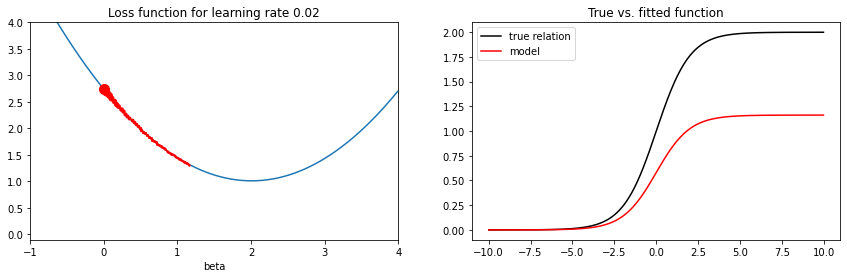

In [12]:
grad_desc_stoch(beta_ini = 0, lrate=0.02, n_epochs = 50, batch_size = 1000)